# <p style="text-align:center">EE 379K: Lab Four</p>
# <p style="text-align:center">Kyle Grier and Stefan Bordovsky</p>
#### <p style="text-align:center">Due: Monday, 10/02, 3:00pm</p>

# Problem 1: PCA.
<p>
    <br>
    <div style="padding-left:40px">
        1. Generate 20 random points in d = 3, from a Gaussian multivariate distribution with mean
[0, 0, 0] and covariance matrix 
$\begin{pmatrix}
  0.5 & 0 & 0 \\
  0 & 0.5 & 0 \\
  0 & 0 & 0.7 \\
  \end{pmatrix}$. Let's call this data with label 1. Also generate 20
random points in $d$ = 3 from another Gaussian with mean [1, 1, 1] and covariance $\begin{pmatrix}
  0.5 & 0 & 0 \\
  0 & 0.5 & 0 \\
  0 & 0 & 0.01 \\
  \end{pmatrix}$.
 Let's call that data with label 2. Create a three dimensional plot of the clouds of data points,
labeled with the two labels.
    </div>
</p>

In [8]:
%matplotlib inline

import matplotlib
import numpy as np
from numpy.linalg import inv
import scipy.linalg as ln
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

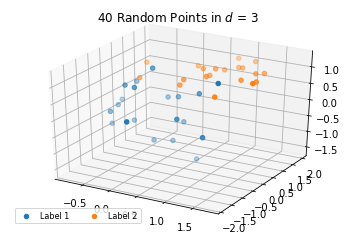

In [9]:
num_samples = 20
data_with_label_1 = np.random.multivariate_normal([0, 0, 0], [[0.5, 0, 0],[0, 0.5, 0],[0, 0, 0.7]], num_samples)
data_with_label_2 = np.random.multivariate_normal([1, 1, 1], [[0.5, 0, 0],[0, 0.5, 0],[0, 0, 0.01]], num_samples)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('40 Random Points in $d$ = 3')
l1 = ax.scatter(data_with_label_1[:, 0], data_with_label_1[:, 1], data_with_label_1[:, 2], s=20, depthshade=True)
l2 = ax.scatter(data_with_label_2[:, 0], data_with_label_2[:, 1], data_with_label_2[:, 2], s=20, depthshade=True)

plt.legend((l1, l2),
           ('Label 1', 'Label 2'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

<p>
    <div style="padding-left:60px">
        2. What do the points look like ?
        <br>
        A: TODO
    </div>
</p>

<p>
    <div style="padding-left:60px">
        3. Concatenate all the points and ignore the labels for now. You have created an X matrix with 40 data points in d = 3 dimensions. Find the covariance matrix of this dataset. <b>Do not simply use np.cov, build the covariance matrix from the definition using linear algebra operations in python.</b>
    </div>
</p>

In [11]:
# http://stattrek.com/matrix-algebra/covariance-matrix.aspx
X = np.concatenate((data_with_label_1, data_with_label_2), axis=0)
n = X.shape[0]
k = X.shape[1]

x = X - (np.matmul(np.ones((n, n)), X) * (1 / n))

covar_x = np.matmul(np.transpose(x), x) / n

print("The covariance matrix of dataset X:")
print(covar_x)

The covariance matrix of dataset X:
[[ 0.68423734  0.27991892  0.44036932]
 [ 0.27991892  0.65838506  0.32975465]
 [ 0.44036932  0.32975465  0.73488827]]


<p>
    <div style="padding-left:60px">
        4. Let's do PCA on this dataset using k = 2 dimensions: Find the two eigenvectors of the covariance matrix with the largest eigenvalues. Project the data points on these two vectors and show the two dimensional plot with the clouds of points. Also show the labels of the points. Did PCA make it easier to distinguish the two labels in two dimensions? <b>Again, do not simply use sklearn PCA. You are only allowed to use matrix operations and np.linalg.eig to find eigenvectors of a matrix.</b>
    </div>
</p>

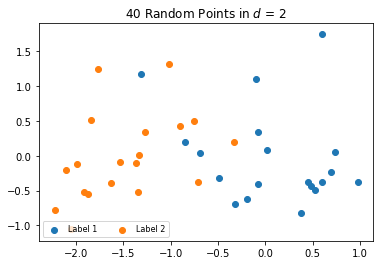

In [29]:
w,v = np.linalg.eig(covar_x)
largest_eigenvectors = np.zeros((3, 2))
largest_eigenvectors[:, 0] = v[:, 0]
largest_eigenvectors[:, 1] = v[:, 2]
X_proj = np.matmul(X, largest_eigenvectors)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title('40 Random Points in $d$ = 2')
l1 = ax.scatter(X_proj[0:19, 0], X_proj[0:19, 1])
l2 = ax.scatter(X_proj[20:39:, 0], X_proj[20:39, 1])

plt.legend((l1, l2),
           ('Label 1', 'Label 2'),
           scatterpoints=1,
           loc='lower left',
           ncol=2,
           fontsize=8)

plt.show()

# Problem 2: Low rank approximation of Mona Lisa.
<p style="padding-left:40px">
    1. Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a singular value decomposition on this matrix using <b>linalg.svd</b>. You can perform a low-rank approximation by zeroing out singular values and keeping only the top $k$. Show the best rank $k$ = 2, $k$ = 5 and $k$ = 10 approximation to Mona Lisa.
</p>

U Shapes:
(603, 603)
(603, 2)
S Shapes:
(400,)
(2,)
V Shapes:
(400, 400)
(2, 400)


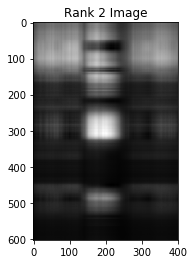

U Shapes:
(603, 603)
(603, 5)
S Shapes:
(400,)
(5,)
V Shapes:
(400, 400)
(5, 400)


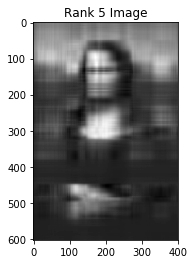

U Shapes:
(603, 603)
(603, 10)
S Shapes:
(400,)
(10,)
V Shapes:
(400, 400)
(10, 400)


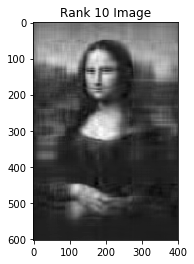

matrix([[ 21.81336403,  60.08658981,  61.09275055, ...,  70.46144104,
          66.89990997,  64.80166626],
        [ 21.83341599,  62.04499817,  63.1021843 , ...,  72.19698334,
          68.78560638,  66.84593964],
        [ 21.25725937,  63.12732697,  64.14704132, ...,  73.20977783,
          69.65940857,  67.86858368],
        ..., 
        [  2.69597626,   7.1342268 ,   7.20346594, ...,   7.06358433,
           6.72978354,   6.68228388],
        [  2.79135656,   7.09815979,   7.14983606, ...,   6.9810524 ,
           6.62368298,   6.56576538],
        [  2.86385846,   7.22993326,   7.29474211, ...,   7.0366888 ,
           6.7063632 ,   6.67193842]], dtype=float32)

In [115]:
import matplotlib.image as img
import scipy.misc

image = scipy.misc.imread('./mona_lisa.png', flatten=True)

# Referenced http://www.frankcleary.com/svdimage/
def low_rank_approximation_plot(M, rank):
    u, s, v = np.linalg.svd(M, full_matrices=True)
    M_k = np.matrix(u[:, :rank]) * np.diag(s[:rank]) * np.matrix(v[:rank, :])
    plt.imshow(M_k, cmap='gray')
    plt.title("Rank %s Image" % rank)
    plt.show()
    return M_k

def low_rank_approximation(M, rank):
    u, s, v = np.linalg.svd(M, full_matrices=True)
    M_k = np.matrix(u[:, :rank]) * np.diag(s[:rank]) * np.matrix(v[:rank, :])
    return M_k

low_rank_approximation_plot(image, 2)
low_rank_approximation_plot(image, 5)
low_rank_approximation_plot(image, 10)


In [122]:
img_length = 603
img_width = 400
bits_per_pixel = 16

ranks = [2, 5, 10]

for i in range(len(ranks)):
    num_bits = (img_length + img_width + 1) * ranks[i] * bits_per_pixel
    print("Number of bits for rank %s approximation: " % ranks[i])
    print(num_bits)

Number of bits for rank 2 approximation: 
32128
Number of bits for rank 5 approximation: 
80320
Number of bits for rank 10 approximation: 
160640


# Problem 3: Using Low Rank Structure for Corrupted Entries.
<p style="padding-left:60px">
        Download files CorrMat1.csv and CorrMat3.csv from Canvas. These are each 100 by 100 matrices. Look at the data and find which entries are corrupted. Then try to correct these corrupted entries. Explain your approach.
</p>

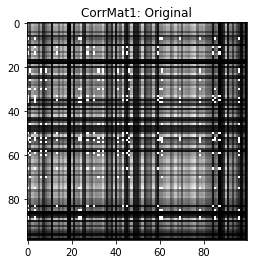

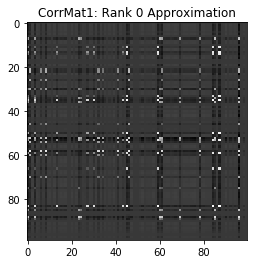

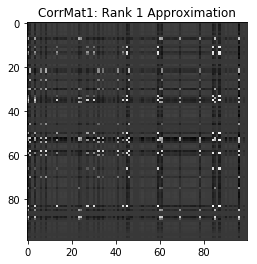

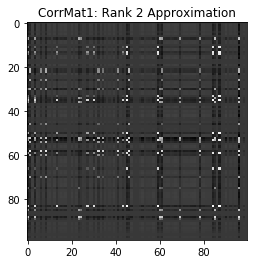

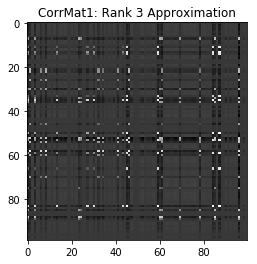

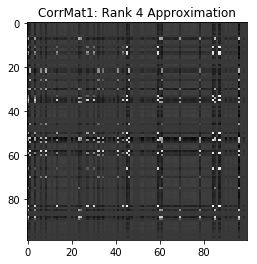

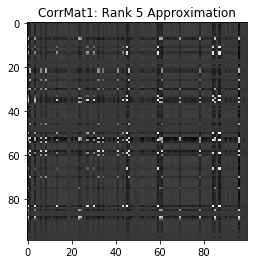

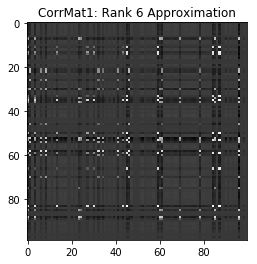

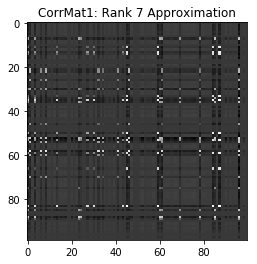

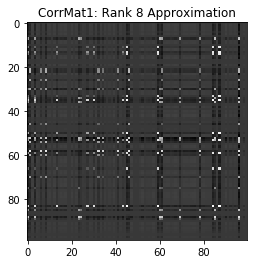

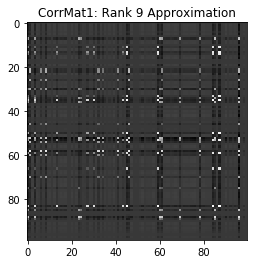

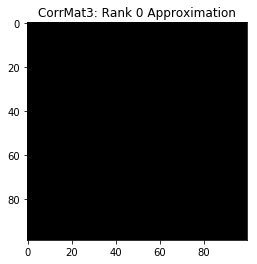

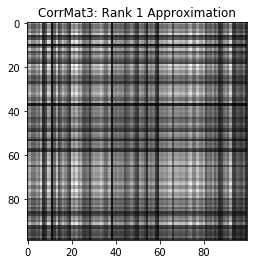

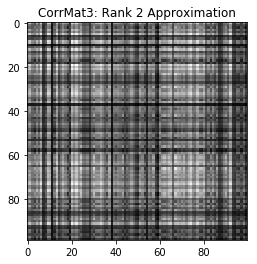

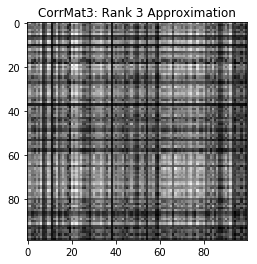

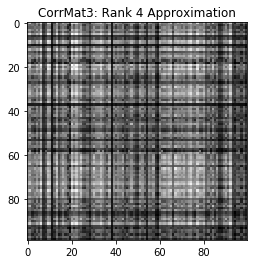

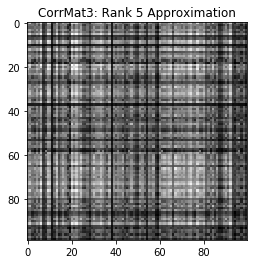

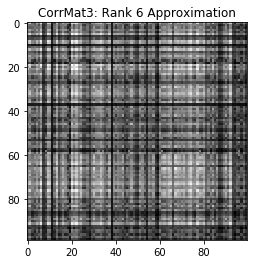

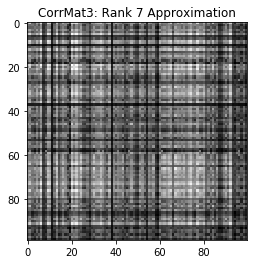

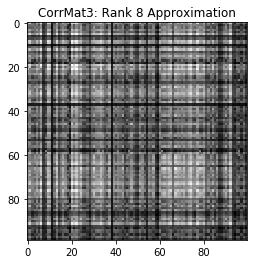

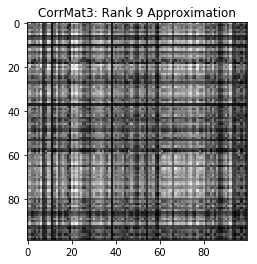

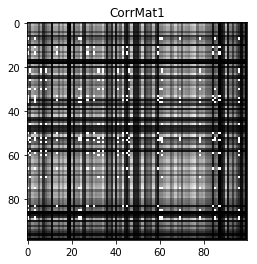

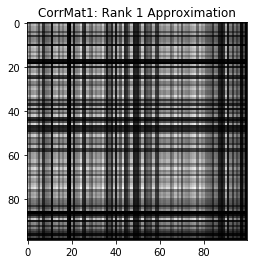

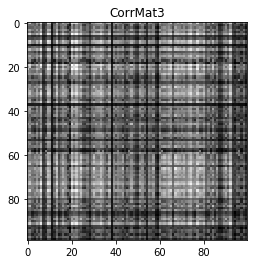

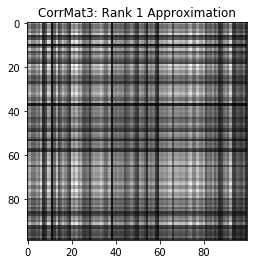

In [114]:
# Referenced http://perception.csl.illinois.edu/matrix-rank/introduction.html
import pandas as pd

corr1 = pd.read_csv('./CorrMat1.csv')
corr3 = pd.read_csv('./CorrMat3.csv')

CorrMat1 = corr1.as_matrix()
CorrMat3 = corr3.as_matrix()

cov_CorrMat1 = np.cov(CorrMat1)
cov_CorrMat3 = np.cov(CorrMat3)

w1,v1 = np.linalg.eig(cov_CorrMat1)
print(w1)

w3,v3 = np.linalg.eig(cov_CorrMat3)
print(w3)

# Printing out the eigenvalues, it appears that for CorrMat1 the principle components are the top 10 eigenvalues and for CorrMat3
#    they are the top 7. Therefore, I'm going to use a low-rank approximation of this matrix to filter out the non-principal
#    data components.
#    In viewing the different low rank approximations, I saw that the rank 1 approximations for both matrices eliminated artifacts
#    and left consistent patterns.
plt.imshow(CorrMat1, cmap='gray')
plt.title("CorrMat1: Original")
plt.show()
for i in range(10):
    # DiffMat1 = CorrMat1 - low_rank_approximation(CorrMat1, i)
    plt.imshow(Mat1, cmap='gray')
    plt.title("CorrMat1: Rank %s Approximation" % i)
    plt.show()

for i in range(10):
    # DiffMat3 = CorrMat3 - low_rank_approximation(CorrMat3, i)
    plt.imshow(low_rank_approximation(CorrMat3, i), cmap='gray')
    plt.title("CorrMat3: Rank %s Approximation" % i)
    plt.show()
    
# Print original matrix with corrupted values.
plt.imshow(CorrMat1, cmap='gray')
plt.title("CorrMat1")
plt.show()
# Print uncorrupted matrix.
plt.imshow(low_rank_approximation(CorrMat1, 1), cmap='gray')
plt.title("CorrMat1: Rank 1 Approximation")
plt.show()
# Print original matrix with corrupted values.
plt.imshow(CorrMat3, cmap='gray')
plt.title("CorrMat3")
plt.show()
# Print uncorrupted matrix.
plt.imshow(low_rank_approximation(CorrMat3, 1), cmap='gray')
plt.title("CorrMat3: Rank 1 Approximation")
plt.show()


<p>
Our approach to removing corrupted data from the two matrices given to us involved using low-rank approximations to filter out potentially corrupted data. Our understanding of low-rank approximations led us to believe that only specific values of sigma in a singular value decomposition (SVD) of our data would contain the underlying pattern we wanted to extract from all the noise in our matrix. To visualize our data, we used plt.imshow and plotted each 100x100 matrix. We found the covariance matrices for each matrix and used these to determine the eigenvalues for each matrix. Looking at these eigenvalues, we saw that the ten highest eigenvalues for CorrMat1 were significantly larger than the rest, and we saw that the seven highest eigenvalues in CorrMat3 were larger than the rest of the eigenvalues for that data. Since the singular values in an SVD (s) correspond to eigenvalues of the matrix, we figured that important data for representing the matrix would exist
</p>